**Cars24 data: Used Car Price Prediction Data**

**Cleaning the Data**

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns

In [2]:
#Importing data, index_col = 0 will help to drop the 0th index column
data = pd.read_csv('https://raw.githubusercontent.com/Shatakshi-Kulkarni/Exploratory_Data_Analysis/refs/heads/main/Cars24.csv', index_col=0)

In [3]:
data.shape

(5918, 10)

In [4]:
data.columns

Index(['Car Brand', 'Model', 'Price', 'Model Year', 'Location', 'Fuel',
       'Driven (Kms)', 'Gear', 'Ownership', 'EMI (monthly)'],
      dtype='object')

In [5]:
#Overview of columns, data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5918 entries, 0 to 5917
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Brand      5918 non-null   object
 1   Model          5653 non-null   object
 2   Price          5918 non-null   int64 
 3   Model Year     5918 non-null   int64 
 4   Location       5918 non-null   object
 5   Fuel           5918 non-null   object
 6   Driven (Kms)   5918 non-null   int64 
 7   Gear           5653 non-null   object
 8   Ownership      5918 non-null   int64 
 9   EMI (monthly)  5918 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 508.6+ KB


In [6]:
data.dtypes

Car Brand        object
Model            object
Price             int64
Model Year        int64
Location         object
Fuel             object
Driven (Kms)      int64
Gear             object
Ownership         int64
EMI (monthly)     int64
dtype: object

In [7]:
#1st 5 rows
data.head(5)

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


In [8]:
#Sample any 5 rows
data.sample(5)

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
1739,Maruti,SwiftZXI AMT,650000,2018,Delhi,Petrol,59607,Automatic,1,14459
4559,Renault,Kwid1.0 RXL,341099,2017,Bangalore,Petrol,22422,Manual,1,7588
4813,Maruti,AltoLXI,250199,2009,Bangalore,Petrol,24474,Manual,1,5566
2410,Maruti,DzireLXI,515399,2019,Delhi,Petrol,11393,Manual,1,11465
322,Hyundai,i20SPORTZ 1.2 O,301599,2010,Hyderabad,Petrol,53951,Manual,2,6709


In [9]:
data.rename(columns = {'Car Brand':'Car_Brand', 'Model Year': 'Model_Year', 'Driven (Kms)': 'Kms_Driven', 'EMI (monthly)': 'Monthly_EMI'}, inplace = "True")

In [10]:
#Extracting rows which are duplicates. drop_duplicates(keep = ) method used to drop one of the duplicates if present
data.loc[data.duplicated()]

,Car_Brand,Model,Price,Model_Year,Location,Fuel,Kms_Driven,Gear,Ownership,Monthly_EMI
3962,Maruti,ErtigaZDI PLUS SHVS,893999,2017,Mumbai,Diesel,15427,Manual,1,19887


In [11]:
data.drop_duplicates(keep = 'last', inplace = True)

In [12]:
data.isnull().sum()

Car_Brand        0
Model          265
Price            0
Model_Year       0
Location         0
Fuel             0
Kms_Driven       0
Gear           265
Ownership        0
Monthly_EMI      0
dtype: int64

In [13]:
missing_data_rows = data.loc[data.isnull().any(axis = 1)]
print(missing_data_rows)

       Car_Brand Model   Price  Model_Year   Location    Fuel  Kms_Driven  \
47         Honda   NaN  630399        2019  Hyderabad  Petrol        7093   
123       Maruti   NaN  297899        2016  Hyderabad  Petrol       60866   
136       Maruti   NaN  337799        2016  Hyderabad  Petrol       47897   
166   Volkswagen   NaN  593799        2017  Hyderabad  Petrol       51013   
179         Tata   NaN  597899        2019  Hyderabad  Petrol       24296   
...          ...   ...     ...         ...        ...     ...         ...   
5847      Maruti   NaN  364499        2016    Chennai  Petrol       49350   
5860    Mahindra   NaN  769599        2018    Chennai  Diesel       25098   
5865     Hyundai   NaN  904599        2017    Chennai  Diesel       97959   
5872      Maruti   NaN  356599        2016    Chennai  Petrol       23199   
5905       Honda   NaN  280999        2008    Chennai  Petrol      108997   

     Gear  Ownership  Monthly_EMI  
47    NaN          1        14023  
123

In [14]:
#Droping rows with null value
data.dropna(inplace = True)
#inplace = True helps in implementing the changes in the dataset updating the dataset with the changes

In [15]:
data.shape

(5652, 10)

In [16]:
#Descriptive summary of numerical data
data.describe()

,Price,Model_Year,Kms_Driven,Ownership,Monthly_EMI
count,5.652000e+03,5652.000000,5652.000000,5652.000000,5652.000000
mean,5.064343e+05,2014.444621,61515.572541,1.288747,11265.350849
std,3.011189e+05,2.874403,42178.167615,0.533892,6698.224782
min,9.100000e+04,2007.000000,353.000000,1.000000,2024.000000
25%,3.177740e+05,2012.000000,31904.000000,1.000000,7068.500000
50%,4.250060e+05,2015.000000,54419.500000,1.000000,9454.000000
75%,6.029242e+05,2017.000000,82266.250000,2.000000,13411.500000
max,3.495000e+06,2021.000000,912380.000000,4.000000,77744.000000


In [17]:
#Checking skewness of numerical data
num_data = data[['Price', 'Kms_Driven']]
def skewness(data):

    skewness_values = {}

    for col in data.columns:
            skewness_values[col] = data[col].skew()   

    return skewness_values

skewness(num_data)

{'Price': 2.5113659217399427, 'Kms_Driven': 2.9642987769408053}

In [18]:
#Checking kurtosis of numerical data
num_data = data[['Price', 'Kms_Driven']]
def kurtosis(data):

    skewness_values = {}

    for col in data.columns:
            skewness_values[col] = data[col].kurt()   

    return skewness_values

kurtosis(num_data)

{'Price': 9.922804527395957, 'Kms_Driven': 36.20044434102882}

In [19]:
#Creating variables with numeric and categorical column resp

numeric_data = data.select_dtypes(include = ['int64', 'float64'])
print(numeric_data)

categorical_data = data.select_dtypes(include = 'object')
print(categorical_data)

        Price  Model_Year  Kms_Driven  Ownership  Monthly_EMI
0      330399        2016       10674          2         7350
1      350199        2011       20979          1         7790
2      229199        2011       47330          2         5098
3      306399        2011       19662          1         6816
4      208699        2015       11256          1         4642
...       ...         ...         ...        ...          ...
5913  1234899        2012      197177          1        27470
5914   892699        2012      115553          2        19858
5915   381399        2014       24663          1         8484
5916   310899        2011       30159          1         6916
5917   159999        2007       51247          2         3559

[5652 rows x 5 columns]
     Car_Brand                     Model   Location          Fuel       Gear
0      Hyundai               EonERA PLUS  Hyderabad        Petrol     Manual
1       Maruti            Wagon R 1.0LXI  Hyderabad        Petrol     Manual


**UNIVARIATE ANALYSIS & NORMALIZATION OF DATA**

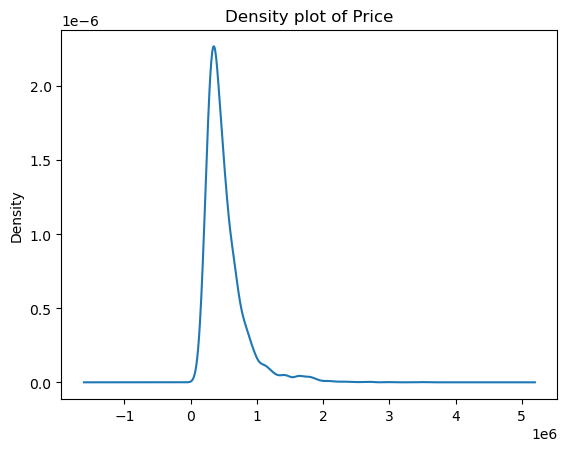

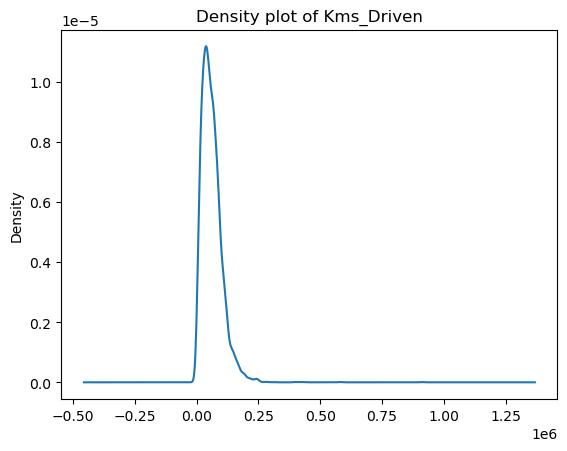

In [20]:
#Density plot
for col in num_data:
    data[col].plot(kind = 'kde', title = f'Density plot of {col}')
    mtp.show()

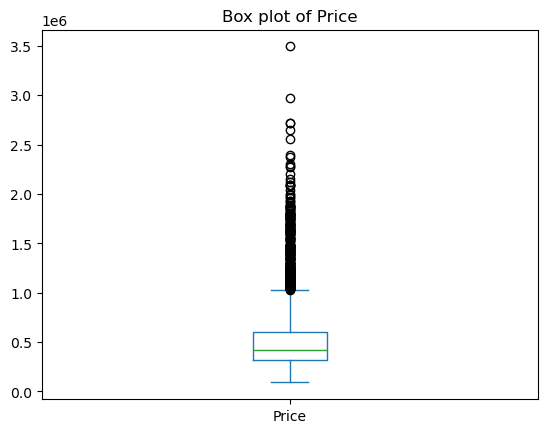

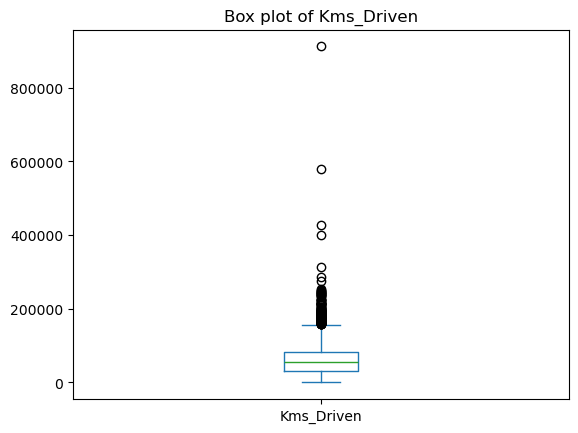

In [21]:
#Box plot
for col in num_data:
    data[col].plot(kind = 'box', title = f'Box plot of {col}')
    mtp.show()

Column: Price, Statistic: 0.7873685166832567, p-value: 2.551046176971979e-65
Price is not normally distributed (reject H0) with p-value 0.0000


e:\Work\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5652.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\shata\AppData\Local\Temp\ipykernel_18084\73108666.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12.70805932 12.7662597  12.34235026 ... 12.85160397 12.6472266
 11.98292909]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  num_data.loc[:, col] = np.log(num_data[col] + 1)  # Log transformation


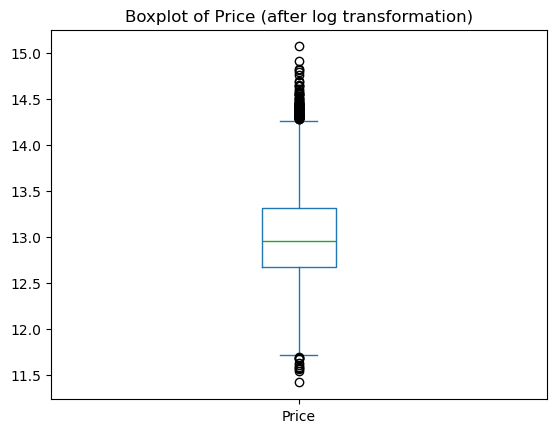

e:\Work\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5652.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\shata\AppData\Local\Temp\ipykernel_18084\73108666.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 9.27565984  9.95132488 10.76492075 ... 10.11309997 10.31427182
 10.84443187]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  num_data.loc[:, col] = np.log(num_data[col] + 1)  # Log transformation


Column: Kms_Driven, Statistic: 0.8575851595323325, p-value: 9.976719158671107e-58
Kms_Driven is not normally distributed (reject H0) with p-value 0.0000


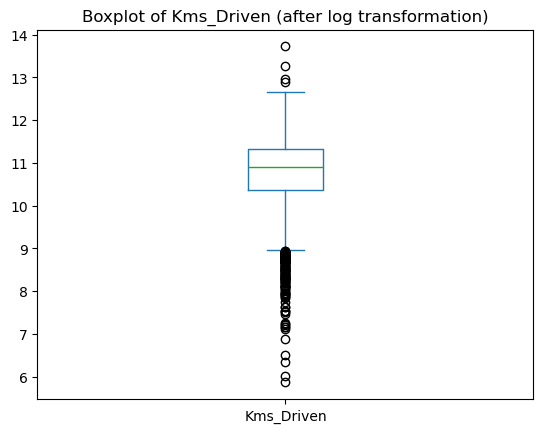

In [22]:
#The Shapiro-Wilk test checks the null hypothesis that the data was drawn from a normal distribution. 

from scipy import stats

alpha = 0.05  # Significance level

for col in num_data:
    stat, p_value = stats.shapiro(num_data[col])
    print(f'Column: {col}, Statistic: {stat}, p-value: {p_value}')

    if p_value > alpha:
        print(f'{col} is normally distributed with p-value {p_value:.4f}')
    else:
        print(f'{col} is not normally distributed (reject H0) with p-value {p_value:.4f}')
        
        # Apply log transformation using .loc for normalization
        num_data.loc[:, col] = np.log(num_data[col] + 1)  # Log transformation
        
        num_data[col].plot(kind='box', title=f'Boxplot of {col} (after log transformation)')
        mtp.show()

In [23]:
#To check normality after applying log transformation. 

from scipy import stats

for col in num_data:
    stat, p_value = stats.shapiro(num_data[col])
    alpha = 0.05
    if p_value > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)


e:\Work\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5652.
  res = hypotest_fun_out(*samples, **kwds)


In [24]:
#Outlier Removal:
#IQR 
#Z-Score

In [25]:
#Value_counts() function used to get counts of unique values of frequency across categorical data
cat_data = data[['Car_Brand', 'Model', 'Ownership', 'Fuel', 'Location']]
for col in cat_data:
    print(f'Value count of column {col}:')
    print(cat_data[col].value_counts())

Value count of column Car_Brand:
Car_Brand
Maruti        2743
Hyundai       1218
Honda          447
Toyota         286
Volkswagen     186
Renault        154
Ford           135
Mahindra       126
Tata            82
Skoda           49
Mercedes        32
Nissan          31
Chevrolet       31
BMW             26
Audi            20
Datsun          20
KIA             14
MG              14
Jeep            13
Fiat            11
Landrover        4
Ssangyong        3
Jaguar           3
Mitsubishi       2
Volvo            1
ISUZU            1
Name: count, dtype: int64
Value count of column Model:
Model
Alto 800LXI               184
Wagon R 1.0VXI            177
Alto K10VXI               156
SwiftVDI                  137
SwiftVXI                  135
                         ... 
TIAGO NRGPETROL             1
Kuv100K8 D 6 STR            1
Santro XingGL CNG           1
CityVX MT O DIESEL          1
i10SPORTZ 1.2 KAPPA2 O      1
Name: count, Length: 902, dtype: int64
Value count of column Ownership:


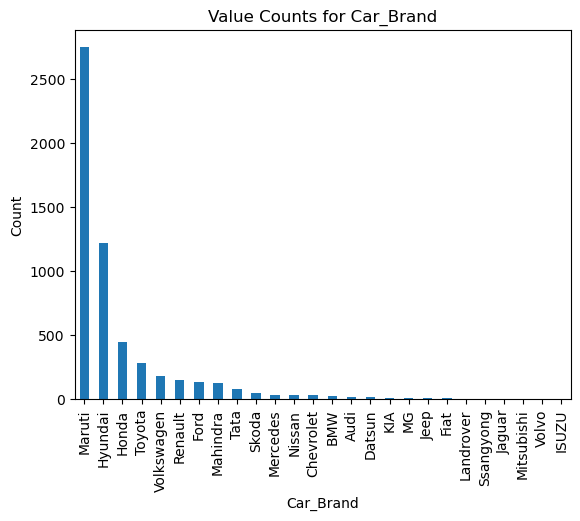

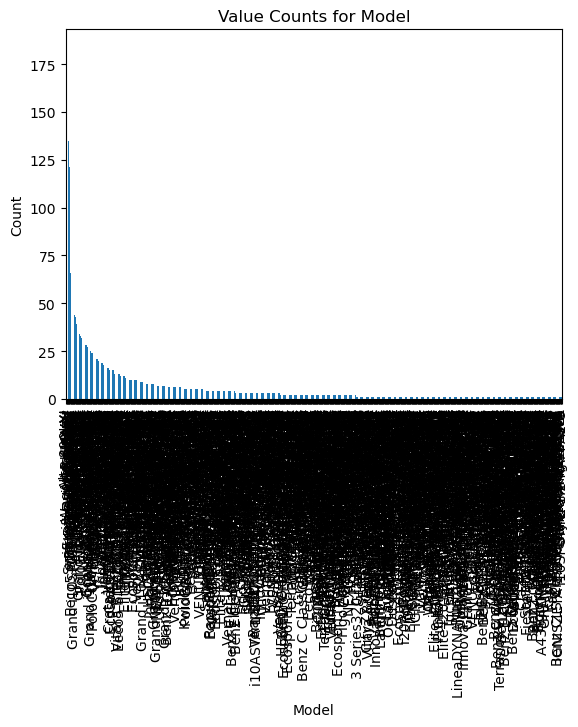

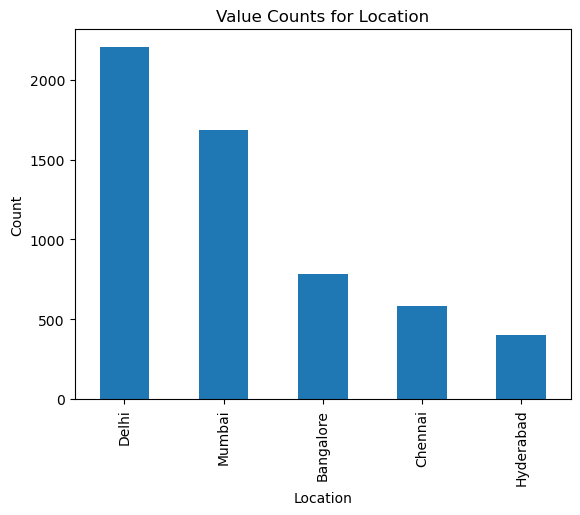

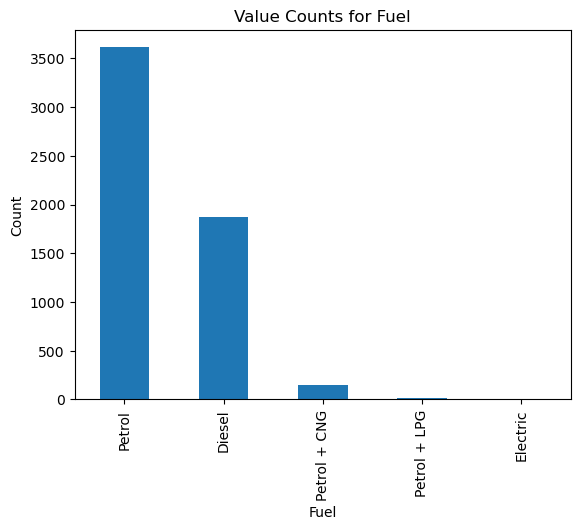

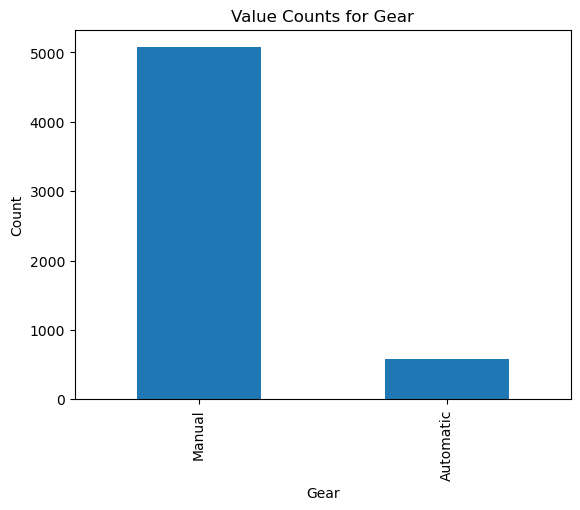

In [26]:
#Bar Plot using value_counts() function
cat_data = data.select_dtypes(include = ['object'])
for cat in cat_data.columns:
    cat_data[cat].value_counts().plot(kind = 'bar')

    mtp.title(f'Value Counts for {cat}')
    mtp.xlabel(cat)
    mtp.ylabel('Count')

    mtp.show()

**BIVARIATE ANALYSIS (Relation)**

In [27]:
data.columns

Index(['Car_Brand', 'Model', 'Price', 'Model_Year', 'Location', 'Fuel',
       'Kms_Driven', 'Gear', 'Ownership', 'Monthly_EMI'],
      dtype='object')

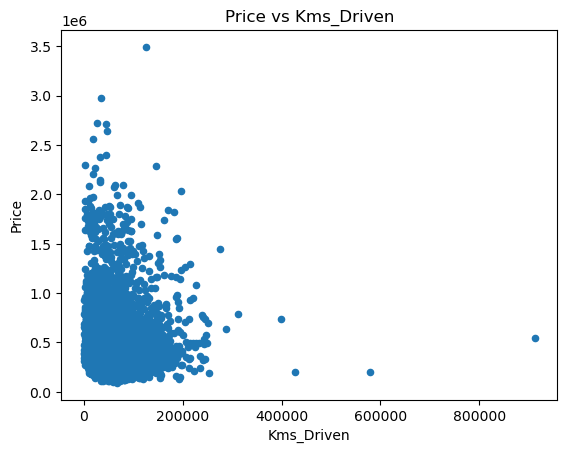

In [28]:
#Scatterplot: Numerical data
data.plot(kind = 'scatter', x = 'Kms_Driven', y = 'Price', title = 'Price vs Kms_Driven')
mtp.show()

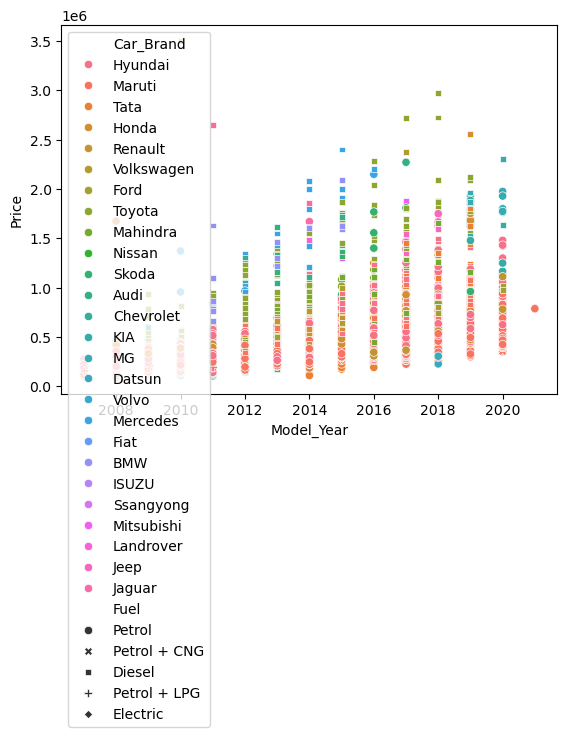

In [29]:
plot = sns.scatterplot(data, x = 'Model_Year', y = 'Price', hue = 'Car_Brand', style = 'Fuel')

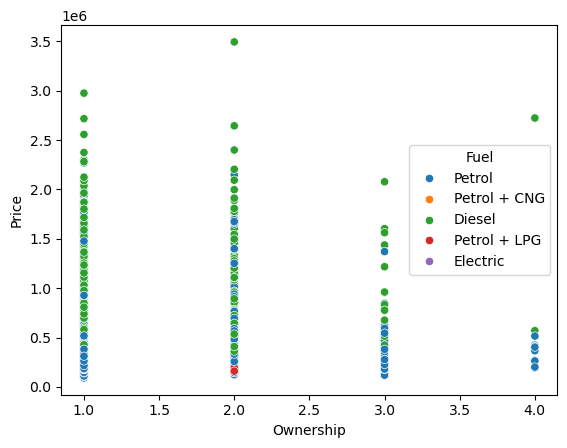

In [30]:
sns.scatterplot(data = data, x = 'Ownership', y = 'Price', hue = 'Fuel')
mtp.show()

In [31]:
#Correlation between numeric data. +1 positive correlation, -1 negative correlation, near to 0 indicates less correlation
#default pearson
numeric_data.corr(method = 'pearson')

,Price,Model_Year,Kms_Driven,Ownership,Monthly_EMI
Price,1.000000,0.486356,-0.076387,-0.088352,1.000000
Model_Year,0.486356,1.000000,-0.393969,-0.243380,0.486357
Kms_Driven,-0.076387,-0.393969,1.000000,0.074945,-0.076387
Ownership,-0.088352,-0.243380,0.074945,1.000000,-0.088352
Monthly_EMI,1.000000,0.486357,-0.076387,-0.088352,1.000000


In [32]:
data.columns

Index(['Car_Brand', 'Model', 'Price', 'Model_Year', 'Location', 'Fuel',
       'Kms_Driven', 'Gear', 'Ownership', 'Monthly_EMI'],
      dtype='object')

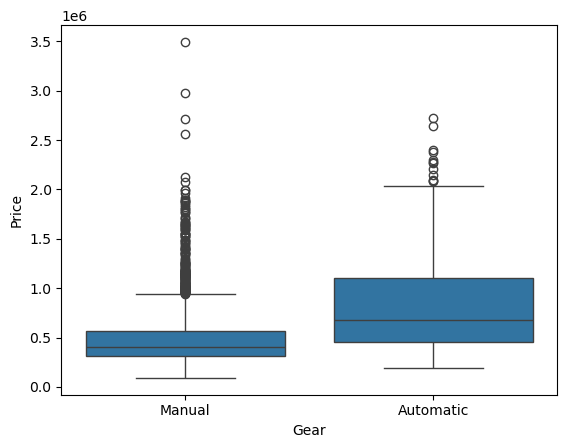

In [33]:
sns.boxplot(data, x = 'Gear', y = 'Price')
mtp.show()

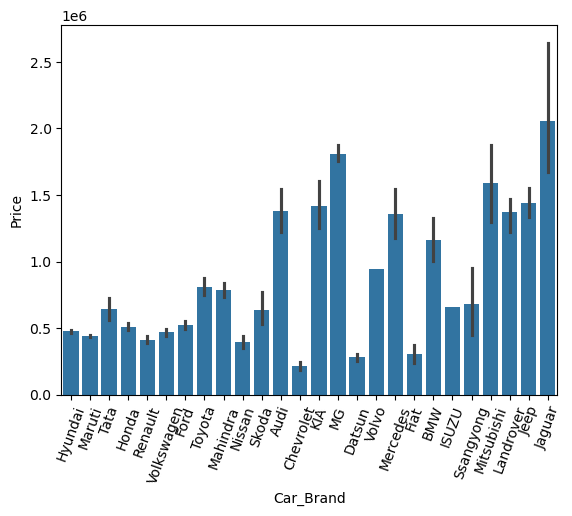

In [34]:
sns.barplot(data, x = 'Car_Brand', y = 'Price')
mtp.xticks(rotation=70)
mtp.show()

T-statistic: 3.6022241304932243
P-value: 0.0003182181826656163
Statistically significant difference observed in Kms_Driven between Manual and Automatic Cars


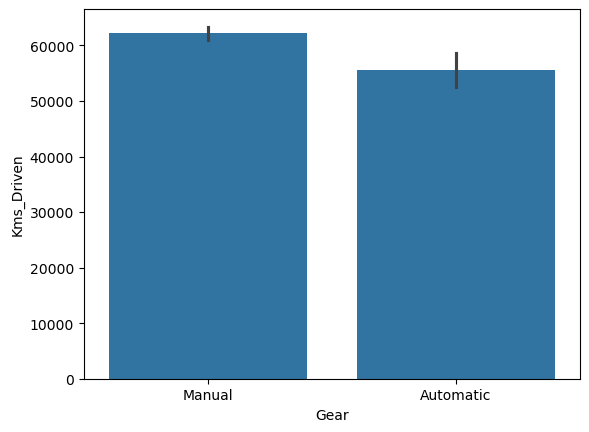

In [35]:
#Relation between Categorical variable and numeric variable, check statistically significant difference
from scipy import stats
manual_kms = data[data['Gear'] == 'Manual']['Kms_Driven']
automatic_kms = data[data['Gear'] == 'Automatic']['Kms_Driven']

t_stat, p_val = stats.ttest_ind(manual_kms, automatic_kms) #t-test to quantify the magnitude of difference, pvalue to provide significance
print('T-statistic:', t_stat)
print('P-value:', p_val)

if p_val < 0.05:
    print("Statistically significant difference observed in Kms_Driven between Manual and Automatic Cars")
else:
    print("No significant difference in Kms_Driven")

sns.barplot(x='Gear', y='Kms_Driven', data=data, estimator=np.mean)
mtp.show()

In [36]:
fuels = data['Fuel'].value_counts().reset_index().rename(columns = {'count':'Count'})
print(fuels)

stat, p_value = stats.shapiro(fuels['Count'])
alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

           Fuel  Count
0        Petrol   3611
1        Diesel   1876
2  Petrol + CNG    146
3  Petrol + LPG     17
4      Electric      2
Sample looks Gaussian (fail to reject H0)


In [37]:
data['Fuel'].unique()

array(['Petrol', 'Petrol + CNG', 'Diesel', 'Petrol + LPG', 'Electric'],
      dtype=object)

F-statistic: 187.1343522173459
P-value: 7.658216697342494e-151
Statistically significant difference observed in Price among Fuel categories


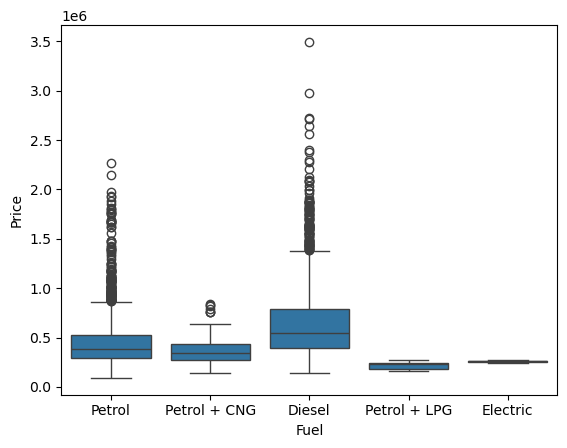

In [38]:
#ANOVA to check Price difference across fuel categories
from scipy import stats
f_stat, p_val = stats.f_oneway(data[data['Fuel'] == 'Petrol']['Price'],
                               data[data['Fuel'] == 'Petrol + CNG']['Price'],
                               data[data['Fuel'] == 'Diesel']['Price'],
                               data[data['Fuel'] == 'Petrol + LPG']['Price'],
                               data[data['Fuel'] == 'Electric']['Price'])
print('F-statistic:', f_stat) #variance
print('P-value:', p_val)

if p_val < 0.05:
    print("Statistically significant difference observed in Price among Fuel categories")
else:
    print("No significant difference in Price")

sns.boxplot(data, x = 'Fuel', y = 'Price')
mtp.show()

In [39]:
pd.crosstab(data['Location'], data['Car_Brand'])

Car_Brand,Audi,BMW,Chevrolet,Datsun,Fiat,Ford,Honda,Hyundai,ISUZU,Jaguar,...,Mercedes,Mitsubishi,Nissan,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,Volvo
Location,,,,,,,,,,,,,,,,,,,,,
Bangalore,3,1,6,4,3,16,45,227,0,0,...,0,0,1,33,8,0,16,19,18,0
Chennai,1,0,1,3,1,15,40,158,0,0,...,0,0,6,11,1,0,7,15,21,0
Delhi,13,11,18,8,5,64,174,410,1,1,...,19,1,13,72,14,2,16,147,51,1
Hyderabad,1,0,0,0,0,6,18,104,0,0,...,0,0,1,3,1,0,4,11,8,0
Mumbai,2,14,6,5,2,34,170,319,0,2,...,13,1,10,35,25,1,39,94,88,0


**MULTIVARIATE ANALYSIS**

<Axes: >

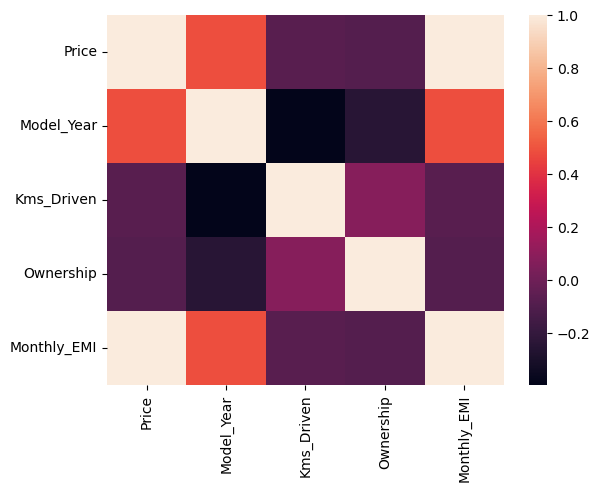

In [40]:
#Correlation between multiple variables
numeric_data.corr()
sns.heatmap(numeric_data.corr())

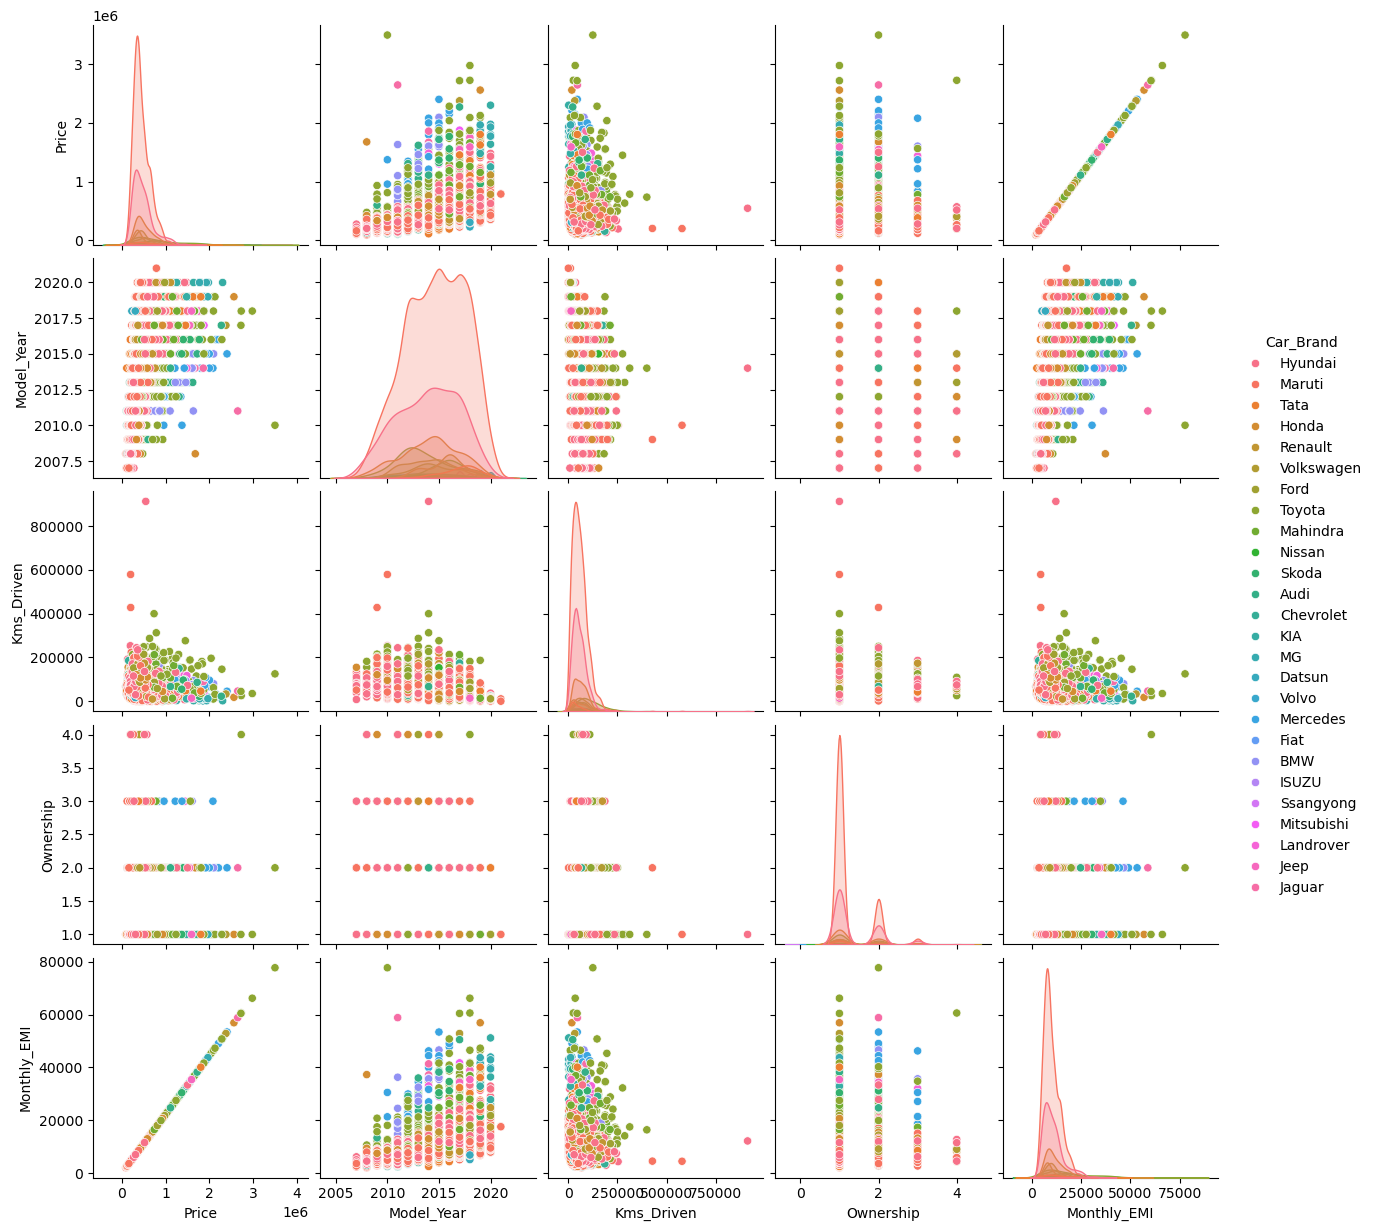

In [41]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
combined_data = data[['Car_Brand']].join(numeric_data) #Numeric dataframe, double brackets used to create dataframe and join to numeric_data dataframe
sns.pairplot(combined_data, hue = 'Car_Brand')
mtp.show()

**FEATURE ENGINEERING**

In [42]:
from sklearn.preprocessing import TargetEncoder

In [43]:
#Calculate the mean target (Price) for each Car_Brand
mean_encoded = data.groupby('Car_Brand')['Price'].mean()

#Map the mean price back to the original dataframe
data['Car_Brand_TargetEncoded'] = data['Car_Brand'].map(mean_encoded)

print(data)


     Car_Brand                     Model    Price  Model_Year   Location  \
0      Hyundai               EonERA PLUS   330399        2016  Hyderabad   
1       Maruti            Wagon R 1.0LXI   350199        2011  Hyderabad   
2       Maruti               Alto K10LXI   229199        2011  Hyderabad   
3       Maruti             RitzVXI BS IV   306399        2011  Hyderabad   
4         Tata             NanoTWIST XTA   208699        2015  Hyderabad   
...        ...                       ...      ...         ...        ...   
5913    Toyota        Fortuner3.0 AT 4X2  1234899        2012    Chennai   
5914    Toyota  Innova2.5 VX 8 STR BS IV   892699        2012    Chennai   
5915    Maruti            Wagon R 1.0VXI   381399        2014    Chennai   
5916   Hyundai    i10SPORTZ 1.2 KAPPA2 O   310899        2011    Chennai   
5917    Maruti        Wagon R DuoLXI LPG   159999        2007    Chennai   

              Fuel  Kms_Driven       Gear  Ownership  Monthly_EMI  \
0           Petrol

In [44]:
data['Car_Brand_TargetEncoded']

0       474482.986043
1       440861.832665
2       440861.832665
3       440861.832665
4       640334.304878
            ...      
5913    809547.559441
5914    809547.559441
5915    440861.832665
5916    474482.986043
5917    440861.832665
Name: Car_Brand_TargetEncoded, Length: 5652, dtype: float64

**QUESTIONS**

     Car_Brand  Count
0        ISUZU      1
1        Volvo      1
2   Mitsubishi      2
3       Jaguar      3
4    Ssangyong      3
5    Landrover      4
6         Fiat     11
7         Jeep     13
8           MG     14
9          KIA     14
10      Datsun     20
11        Audi     20
12         BMW     26
13   Chevrolet     31
14      Nissan     31
15    Mercedes     32
16       Skoda     49
17        Tata     82
18    Mahindra    126
19        Ford    135
20     Renault    154
21  Volkswagen    186
22      Toyota    286
23       Honda    447
24     Hyundai   1218
25      Maruti   2743


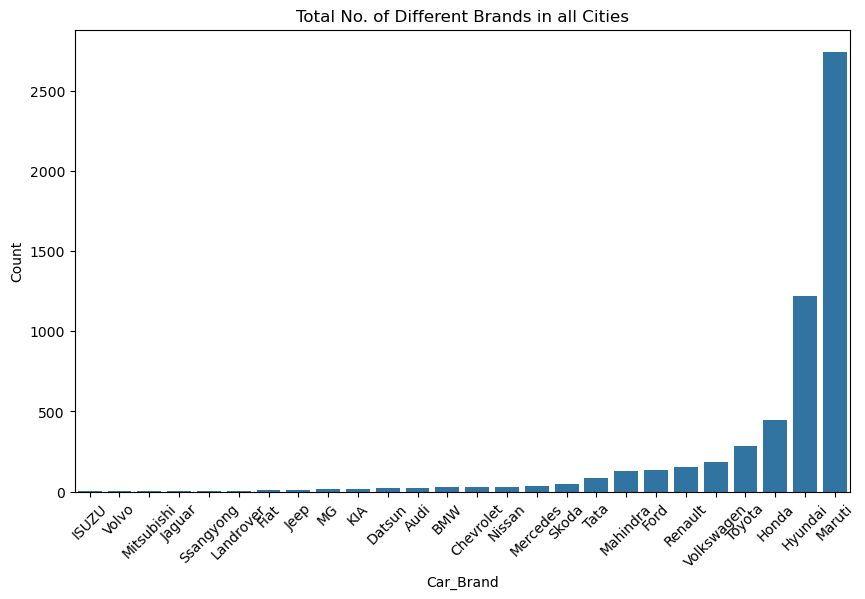

In [45]:
#Total no. of Car brands in a Cities
brand_count = data['Car_Brand'].value_counts().sort_values().reset_index().rename(columns = {'count': 'Count'})
print(brand_count)

mtp.figure(figsize=(10, 6))
sns.barplot(data=brand_count, x='Car_Brand', y='Count')
mtp.title('Total No. of Different Brands in all Cities')
mtp.xticks(rotation=45)
mtp.show()

<Axes: xlabel='count', ylabel='Location'>

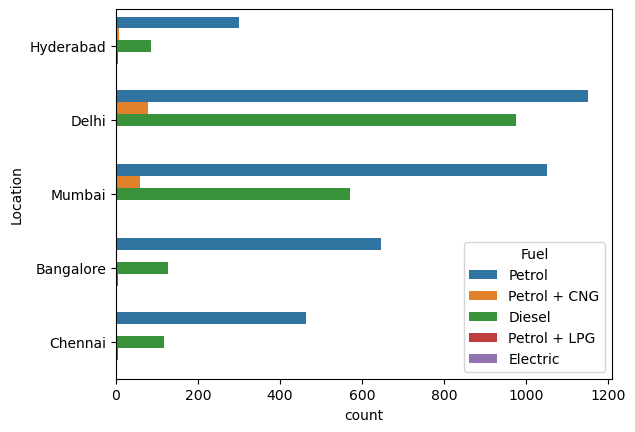

In [46]:
#No. of Cars based on Fuel type in cities
fuel_location = data.groupby(by=['Location','Fuel']).size().reset_index(name = 'Count')
fuel_location = fuel_location.sort_values(by=['Location','Count'],ascending=True).reset_index()
fuel_location = fuel_location.drop('index',axis=1)
fuel_location

sns.countplot(y = 'Location',hue='Fuel',data = data)

**EXPLORATORY DATA ANALYSIS**
**--> DATA SPLITTING**
**--> FEATURE SCALING**
**--> FEATURE EXTRACTION & PCA**
**--> MODEL/ALGORITHM SELECTION**
**--> TRAINING THE MODEL**
**--> MODEL EVALUATION**